# Analysis of the PIX in Brazil

### Libraries

In [6]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

### connecting with API

In [7]:
response_API = requests.get('https://olinda.bcb.gov.br/olinda/servico/SPI/versao/v1/odata/PixLiquidadosAtual?%24format=json')

#print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)

parse_json = parse_json['value']

df = pd.DataFrame(parse_json)

# Cleaning and processing

### Initial Data Exploration:

In [10]:
# head
df.head()

,Data,Quantidade,Total,Media
0,2021-06-04,24945880,17229599.27,690.68
1,2021-09-28,28840568,17964083.35,622.88
2,2022-10-28,75938264,40180577.53,529.12
3,2022-12-01,93207145,47313669.38,507.62
4,2022-04-06,59981242,32855707.99,547.77


In [11]:
# descriptive statistics of the data
df.describe()

,Quantidade,Total,Media
count,1.083000e+03,1.083000e+03,1083.000000
mean,5.141446e+07,2.322226e+07,481.626048
std,3.400325e+07,1.761349e+07,232.881652
min,2.345000e+03,2.102400e+02,89.650000
25%,2.361185e+07,7.423213e+06,234.185000
50%,4.736079e+07,1.913966e+07,515.010000
75%,7.639719e+07,3.680065e+07,616.330000
max,1.630081e+08,7.730169e+07,1309.440000


In [12]:
# infors about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        1083 non-null   object 
 1   Quantidade  1083 non-null   int64  
 2   Total       1083 non-null   float64
 3   Media       1083 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 34.0+ KB


In [13]:
# min and max values
col1 = 'Data'
col1min = df['Data'].min()
col1max = df['Data'].max()
print('The min value of column', col1,'is', col1min, 'and max is', col1max)

The min value of column Data is 2020-11-03 and max is 2023-10-21


### Handle Missing Data:

In [15]:
# check missing values
df.isnull().sum()

Data          0
Quantidade    0
Total         0
Media         0
dtype: int64

### Data Type and Conversion

In [17]:
# identify types
df.dtypes

Data           object
Quantidade      int64
Total         float64
Media         float64
dtype: object

In [18]:
# change type
pd.to_numeric(df['Media'])
pd.to_numeric(df[ 'Total'])

df.head(3)

,Data,Quantidade,Total,Media
0,2021-06-04,24945880,17229599.27,690.68
1,2021-09-28,28840568,17964083.35,622.88
2,2022-10-28,75938264,40180577.53,529.12


### Quality of data

In [21]:
# duplicates values
def analyze_column(df, column_name):
    col = df[column_name]
    total_count = col.count()
    unique_count = col.nunique()
    return total_count, unique_count


columns_to_analyze = ['Data', 'Quantidade','Total', 'Media']

for column_name in columns_to_analyze:
    total_count, unique_count = analyze_column(df, column_name)
    print(f"The quantity of the column {column_name} is {total_count} and the unique quantity is {unique_count}")

The quantity of the column Data is 1083 and the unique quantity is 1083
The quantity of the column Quantidade is 1083 and the unique quantity is 1083
The quantity of the column Total is 1083 and the unique quantity is 1083
The quantity of the column Media is 1083 and the unique quantity is 1071


### Plot Data

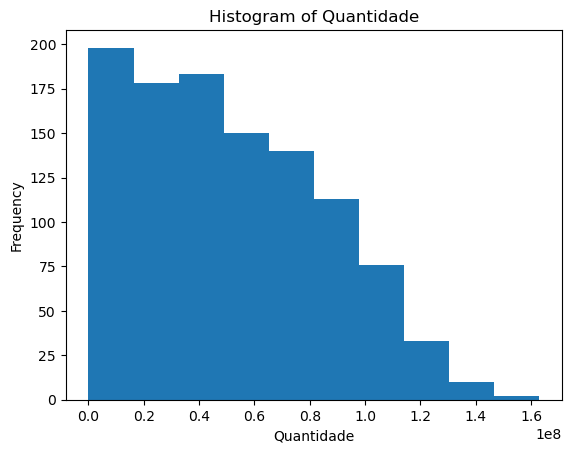

In [22]:
# plot the data


# Histogram
col_hist_1 = 'Quantidade'
plt.hist(df[col_hist_1])
plt.xlabel(col_hist_1)
plt.ylabel('Frequency')
title = 'Histogram of ' + col_hist_1
plt.title(title)
plt.show()

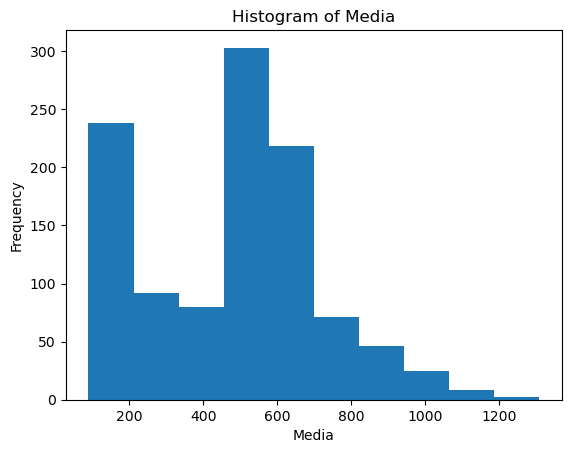

In [23]:
# Histogram
col_hist_2 = 'Media'
plt.hist(df[col_hist_2])
plt.xlabel(col_hist_2)
plt.ylabel('Frequency')
title = 'Histogram of ' + col_hist_2
plt.title(title)
plt.show()

In [ ]:
# Perform statistical tests
